In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
data_neci = np.genfromtxt("N2_nontcfciqmc_bind_vdz.dat")
data_ccsd = np.genfromtxt("N2_ccsd_bind_vdz.dat")

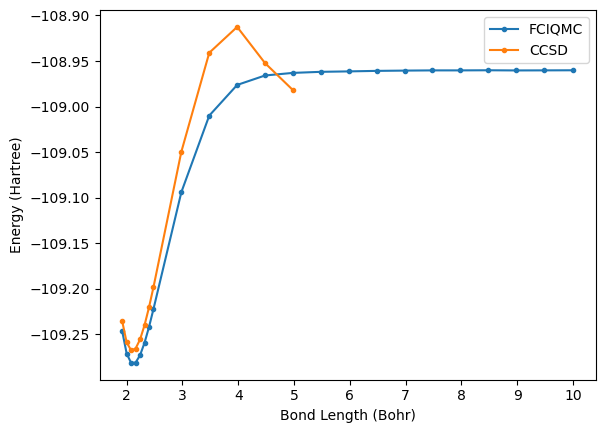

In [17]:
plt.plot(data_neci[:,0], data_neci[:,1], '.-', label="FCIQMC")
plt.plot(data_ccsd[:,0], data_ccsd[:,1], '.-', label="CCSD")
plt.legend()
# plt.grid(True, which="both", ls="--")
plt.xlabel("Bond Length (Bohr)")
plt.ylabel("Energy (Hartree)")
plt.savefig("N2_vdz_nontc.pdf", bbox_inches="tight")
# plt.grid()
plt.show()